In [89]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import csv as csv

# /Users/hayatoyamaguchi/Public/kaggle/House Price/house-prices-advanced-regression-techniques

path = "house-prices-advanced-regression-techniques/"
train_df = pd.read_csv(path+"train.csv", header=0)
test_df = pd.read_csv(path+"test.csv", header=0)
train_df['WhatIsData'] = 'Train'
test_df['WhatIsData'] = 'Test'
train_df.tail()

for i in range(1,10):
    test_df.loc[train_df["OverallQual"]==i,"OverallQual"] =  np.average(train_df[train_df["OverallQual"]==i]["SalePrice"])
    train_df.loc[train_df["OverallQual"]==i,"OverallQual"] =  np.average(train_df[train_df["OverallQual"]==i]["SalePrice"])
test_df["OverallQual"].head()



0    207716.423197
1    161603.034759
2    207716.423197
3    207716.423197
4    274735.535714
Name: OverallQual, dtype: float64

In [90]:
drop_train_df = train_df.drop('SalePrice',axis=1)
allData = pd.concat([drop_train_df,test_df],axis=0)
allData['TotalSF'] = allData['TotalBsmtSF'] + allData['1stFlrSF'] + allData['2ndFlrSF']
print(train_df.shape)
print(drop_train_df.shape)
print(test_df.shape)
print(allData.shape)
allData["LotFrontage"] = allData.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
na_col_list = allData.isnull().sum()[allData.isnull().sum()>0].sort_values(ascending=False).index.tolist()
for row in na_col_list:
    if allData[row].dtypes == "float64":
        allData[row][allData[row].isnull()] = 0
    else:
        allData[row][allData[row].isnull()] = "NA"

dropData = allData[allData.columns[allData.columns != "WhatIsData"]]

data_dummies = pd.get_dummies(dropData)
transdropData = pd.concat([dropData,data_dummies],axis=1)

transdropData = transdropData.select_dtypes(include=["float64","int64","uint8"])
transdropData = transdropData.astype('int')
a = transdropData.select_dtypes(include="object")
print(a.shape)
print(transdropData.shape)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = transdropData.columns.values
transdropData_scaled = pd.DataFrame(scaler.fit(transdropData).transform(transdropData),columns=columns)
print(transdropData_scaled.shape)
print(allData["WhatIsData"].shape)
# transAllData = pd.concat([transdropData_scaled,allData["WhatIsData"]],axis=1)

transdropData_scaled["WhatIsData"] = list(allData["WhatIsData"])
transAllData = transdropData_scaled

from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(train_df["SalePrice"])
type(np.log(train_df["SalePrice"][0]))

transAllData2 = transAllData.loc[:,~transAllData.columns.duplicated()]
print(transAllData.shape)
print(transAllData2.shape)

X_train = transAllData2[transAllData2['WhatIsData']=='Train'].drop(['WhatIsData','Id'], axis=1)
y_train = np.log(train_df["SalePrice"])
X_test = transAllData2[transAllData2['WhatIsData']=='Test'].drop(['WhatIsData','Id'], axis=1)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(X_train, y_train)
print('Training done using Random Forest')

from pylab import rcParams

rcParams['figure.figsize'] = 20,200

ranking = np.argsort(-rf.feature_importances_)

X_train = X_train.iloc[:,ranking[:37]]
X_test = X_test.iloc[:,ranking[:37]]
X_train["Interaction"] = X_train["TotalSF"]*X_train["OverallQual"]
X_test["Interaction"] = X_test["TotalSF"]*X_test["OverallQual"]
X_train.head()

(1460, 82)
(1460, 81)
(1459, 81)
(2919, 82)


/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


(2919, 0)
(2919, 351)
(2919, 351)
(2919,)
(2919, 352)
(2919, 314)


/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


Training done using Random Forest


,TotalSF,OverallQual,YearBuilt,ExterQual_TA,GarageCars,OverallCond,YearRemodAdd,GarageArea,LotArea,GrLivArea,...,KitchenQual_Ex,SaleCondition_Family,MasVnrArea,Neighborhood_OldTown,TotRmsAbvGrd,EnclosedPorch,YrSold,Fireplaces,SaleCondition_Abnorml,Interaction
0,0.023361,0.517316,1.046258,-1.266462,0.307040,-0.507284,0.896833,0.349364,-0.217879,0.413547,...,-0.274835,-0.126535,0.529034,-0.298629,0.986849,-0.359601,0.157646,-0.924311,-0.263861,0.012085
1,-0.028762,-0.223801,0.154764,0.789601,0.307040,2.188279,-0.395604,-0.058991,-0.072044,-0.471891,...,-0.274835,-0.126535,-0.567016,-0.298629,-0.287758,-0.359601,-0.602962,0.623632,-0.263861,0.006437
2,0.197105,0.517316,0.980221,-1.266462,0.307040,-0.507284,0.848965,0.627787,0.137197,0.563755,...,-0.274835,-0.126535,0.338903,-0.298629,-0.287758,-0.359601,0.157646,0.623632,-0.263861,0.101966
3,-0.092054,0.517316,-1.859351,0.789601,1.619264,-0.507284,-0.682812,0.785561,-0.078385,0.427382,...,-0.274835,-0.126535,-0.567016,-0.298629,0.349546,3.874967,-1.363569,0.623632,3.789876,-0.047621
4,0.987641,1.594429,0.947203,-1.266462,1.619264,-0.507284,0.753229,1.685798,0.518903,1.378042,...,-0.274835,-0.126535,1.390216,-0.298629,1.624153,-0.359601,0.157646,0.623632,-0.263861,1.574723


In [88]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
param_grid = {"max_depth":[3,4,5],"colsample_bytree":[0.5,0.6,0.7,0.8,0.9,1]}


# "min_child_weigh":[1,2,4,7,10]
# "colsample_bytree":[0.5,0.6,0.7,0.8,0.9,1]
# "max_depth":[3,4,5],"learning_rate":[0.03,0.1,0.3]
# "colsample_bytree":[0.5,0.6,0.7,0.8,0.9,1]

# max_depth=3,learning_rate=0.1,colsample_bytree=0.6
xgb = xgb.XGBRegressor(learning_rate=0.1)
grid_search = GridSearchCV(xgb, param_grid)
# , scoring = "neg_mean_squared_error"
grid_search.fit(X_train,y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

results = pd.DataFrame(grid_search.cv_results_)
results

/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xg

/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed i

0.8942793053923573
{'colsample_bytree': 0.5, 'max_depth': 5}


/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.303504,0.018177,0.004430,0.000502,0.5,3,"{'colsample_bytree': 0.5, 'max_depth': 3}",0.910449,0.873319,0.895097,0.892953,0.015239,8,0.956760,0.959425,0.956972,0.957719,0.001210
1,0.356791,0.006873,0.004153,0.000027,0.5,4,"{'colsample_bytree': 0.5, 'max_depth': 4}",0.908730,0.874716,0.897367,0.893602,0.014144,3,0.972094,0.975341,0.972140,0.973192,0.001520
2,0.416738,0.001652,0.004592,0.000089,0.5,5,"{'colsample_bytree': 0.5, 'max_depth': 5}",0.906535,0.877375,0.898938,0.894279,0.012355,1,0.983409,0.984387,0.984515,0.984103,0.000494
3,0.324557,0.009315,0.004119,0.000220,0.6,3,"{'colsample_bytree': 0.6, 'max_depth': 3}",0.909525,0.878615,0.892452,0.893532,0.012646,4,0.956081,0.960325,0.957559,0.957989,0.001759
4,0.403380,0.005609,0.004943,0.000929,0.6,4,"{'colsample_bytree': 0.6, 'max_depth': 4}",0.909207,0.876698,0.896544,0.894148,0.013384,2,0.972677,0.975514,0.974404,0.974198,0.001167
5,0.509878,0.008509,0.004520,0.000185,0.6,5,"{'colsample_bytree': 0.6, 'max_depth': 5}",0.910340,0.875242,0.893238,0.892940,0.014335,9,0.982665,0.984098,0.983140,0.983301,0.000596
6,0.373348,0.007410,0.004291,0.000604,0.7,3,"{'colsample_bytree': 0.7, 'max_depth': 3}",0.910322,0.872154,0.889092,0.890524,0.015620,17,0.956800,0.960464,0.959373,0.958879,0.001536
7,0.470370,0.005802,0.004420,0.000015,0.7,4,"{'colsample_bytree': 0.7, 'max_depth': 4}",0.912295,0.870539,0.897586,0.893471,0.017299,5,0.973223,0.976032,0.974686,0.974647,0.001147
8,0.564307,0.019664,0.004515,0.000151,0.7,5,"{'colsample_bytree': 0.7, 'max_depth': 5}",0.911324,0.872898,0.895569,0.893262,0.015777,6,0.983563,0.984975,0.985247,0.984595,0.000738
9,0.428011,0.006448,0.003956,0.000106,0.8,3,"{'colsample_bytree': 0.8, 'max_depth': 3}",0.908636,0.870412,0.890920,0.889989,0.015624,18,0.958347,0.961799,0.957735,0.959294,0.001789


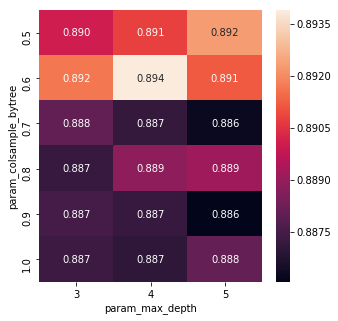

In [70]:
def plot_heatmap_from_grid(grid):
    # チューニング対象のパラメータを特定する。
    params = [k for k in grid.cv_results_.keys() if k.startswith('param_')]
    if len(params) != 2: raise Exception('grid has to have exact 2 parameters.') 

    # ヒートマップの行、列、値に使うキーを定義する。
    index = params[0]
    columns = params[1]
    values = 'mean_test_score'

    # gridから必要なキーのみを抽出する。
    df_dict = {k: grid.cv_results_[k] for k in grid.cv_results_.keys() & {index, columns, values}}
    rcParams['figure.figsize'] = 5,5
    # dictをDataFrameに変換してseabornでヒートマップを表示する。
    import pandas as pd
    df = pd.DataFrame(df_dict)
    data = df.pivot(index=index, columns=columns, values=values)
    import seaborn as sns
    sns.heatmap(data, annot=True, fmt='.3f')
plot_heatmap_from_grid(grid_search)

/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and w

/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


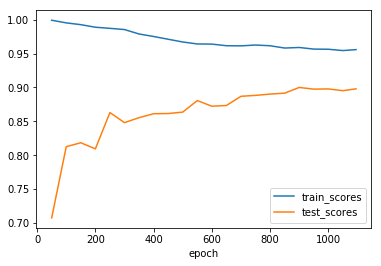

In [74]:
from sklearn.model_selection import train_test_split
X_train_train,X_val,y_train_train,y_val = train_test_split(X_train,y_train, random_state=0)
import xgboost as xgb
# epochs = [100,200,300,400,500,600,700,800,900,1000,1095]
epochs = [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,1050,1095]
train_scores = []
test_scores = []
for epoch in epochs:
    model = xgb.XGBRegressor(max_depth=3,learning_rate=0.1,colsample_bytree=0.6)
    X_train_epoch = X_train_train[:epoch]
    y_train_epoch = y_train_train[:epoch]
#     print(X_train_epoch.shape)
#     print(y_train_epoch.shape)
    model.fit(X_train_epoch,y_train_epoch)
#     print(forest.score(X_train_epoch,y_train_epoch))
#     print(forest.score(X_val,y_val))
    train_scores.append(model.score(X_train_epoch,y_train_epoch))
    test_scores.append(model.score(X_val,y_val))
import matplotlib.pyplot as plt
%matplotlib inline
x = epochs
y0 = train_scores
y1 = test_scores
fig = plt.figure()
plt.xlabel('epoch')
plt.plot(x, y0, label='train_scores')
plt.plot(x, y1, label='test_scores')
plt.legend()
plt.show()

In [92]:
from datetime import datetime
time= datetime.now().strftime("%Y%m%d-%H%M%S")
model = xgb.XGBRegressor(max_depth=3,learning_rate=0.1,colsample_bytree=0.6)
model.fit(X_train,y_train)
predictions = np.exp(model.predict(X_test))

df_result = pd.DataFrame()
df_result['Id'] = test_df['Id']
df_result['SalePrice'] = predictions
df_result.to_csv('result.csv'+time,index=False)
df_result

AttributeError: 'XGBRegressor' object has no attribute 'XGBRegressor'

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(X_train, y_train)
print('Training done using Random Forest')

from pylab import rcParams

rcParams['figure.figsize'] = 20,500
# from pylab import rcParams

# rcParams['figure.figsize'] = 20,200

ranking = np.argsort(-rf.feature_importances_)
# f, ax = plt.subplots(figsize=(11, 20))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

Training done using Random Forest


In [91]:
X_train.shape

(1460, 38)